### 4. Seaboran 패키지

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# path = 'C:/Users/YOnSAI/AppData/Local/Microsoft/Windows/Fonts' 
# fm.fontManager.addfont(path + '/NanumBarunGothic.ttf')
# plt.rcParams['font.family'] = 'NanumBarunGothic'

# path = 'C:\\Users\\sujung\\AppData\\Local\\Microsoft\\Windows\\Fonts'   # 집
# fm.fontManager.addfont(path + '\\NanumGothic.ttf')
# plt.rcParams['font.family'] = 'NanumGothic'

In [4]:
iris = sns.load_dataset("iris")         # 붓꽃 데이터
titanic = sns.load_dataset("titanic")   # 타이타닉호 데이터
tips = sns.load_dataset("tips")         # 팁 데이터
flights = sns.load_dataset("flights")   # 여객운송 데이터
mpg = sns.load_dataset('mpg')           # mile per gallon 데이터


- 1차원 분포

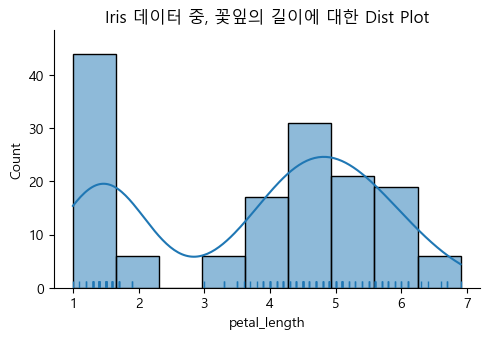

In [5]:
# distplot(distribution plot)
x = iris.petal_length.values
# sns.distplot(x, kde=True, rug=True)
# sns.displot(x, rug=True, kde=True)
fg = sns.displot(x='petal_length', rug=True, kde=True, data=iris)
fg.fig.set_size_inches(5, 3)
plt.title('Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot')
plt.show()

- 카운트 플롯

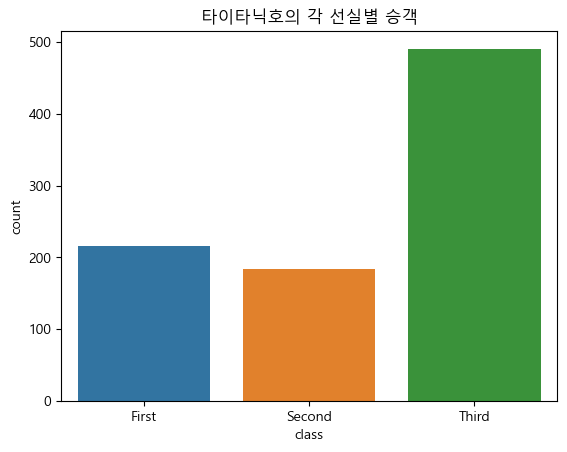

In [6]:
sns.countplot(x='class', data=titanic)
plt.title('타이타닉호의 각 선실별 승객')
plt.show()

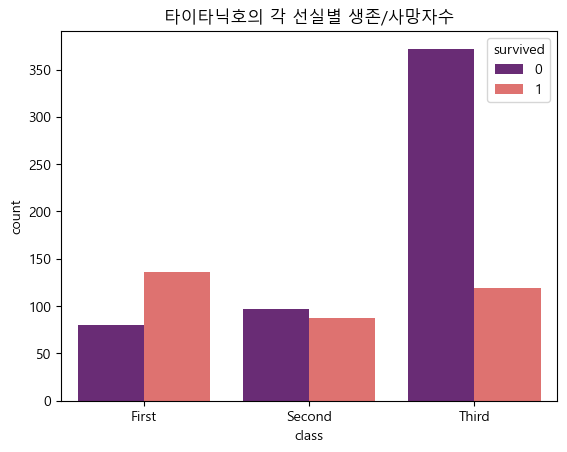

In [7]:
sns.countplot(x='class', hue='survived', data=titanic, palette='magma')
plt.title('타이타닉호의 각 선실별 생존/사망자수')
plt.show()

- 다차원 실수 데이터

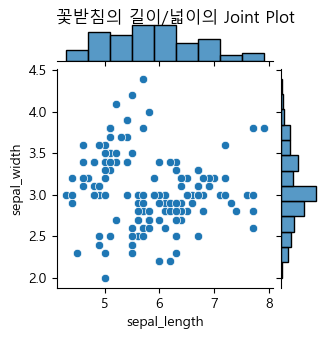

In [8]:
# joint plot
fg = sns.jointplot(x='sepal_length', y='sepal_width', data=iris)
fg.fig.set_size_inches(3, 3)
plt.suptitle('꽃받침의 길이/넓이의 Joint Plot', y=1.02)
plt.show()

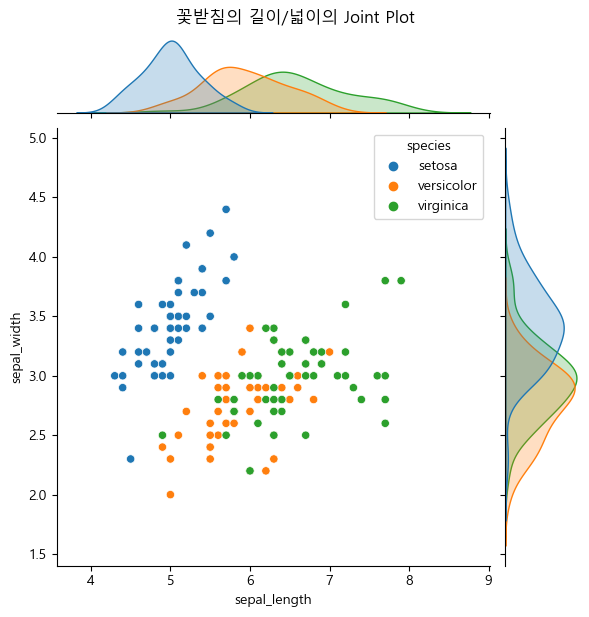

In [9]:
# joint plot
sns.jointplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.suptitle('꽃받침의 길이/넓이의 Joint Plot', y=1.02)
plt.show()

In [10]:
# pair plot
sns.pairplot(hue='species', data=iris);


- 다차원 카테고리 데이터

In [11]:
# heatmap
df = titanic.pivot_table('survived', 'class', 'sex', 'count')
# df = titanic.pivot_table(index='class', columns='sex', aggfunc='count')
# df = titanic.pivot_table(index='class', columns='sex', aggfunc='size')
df

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


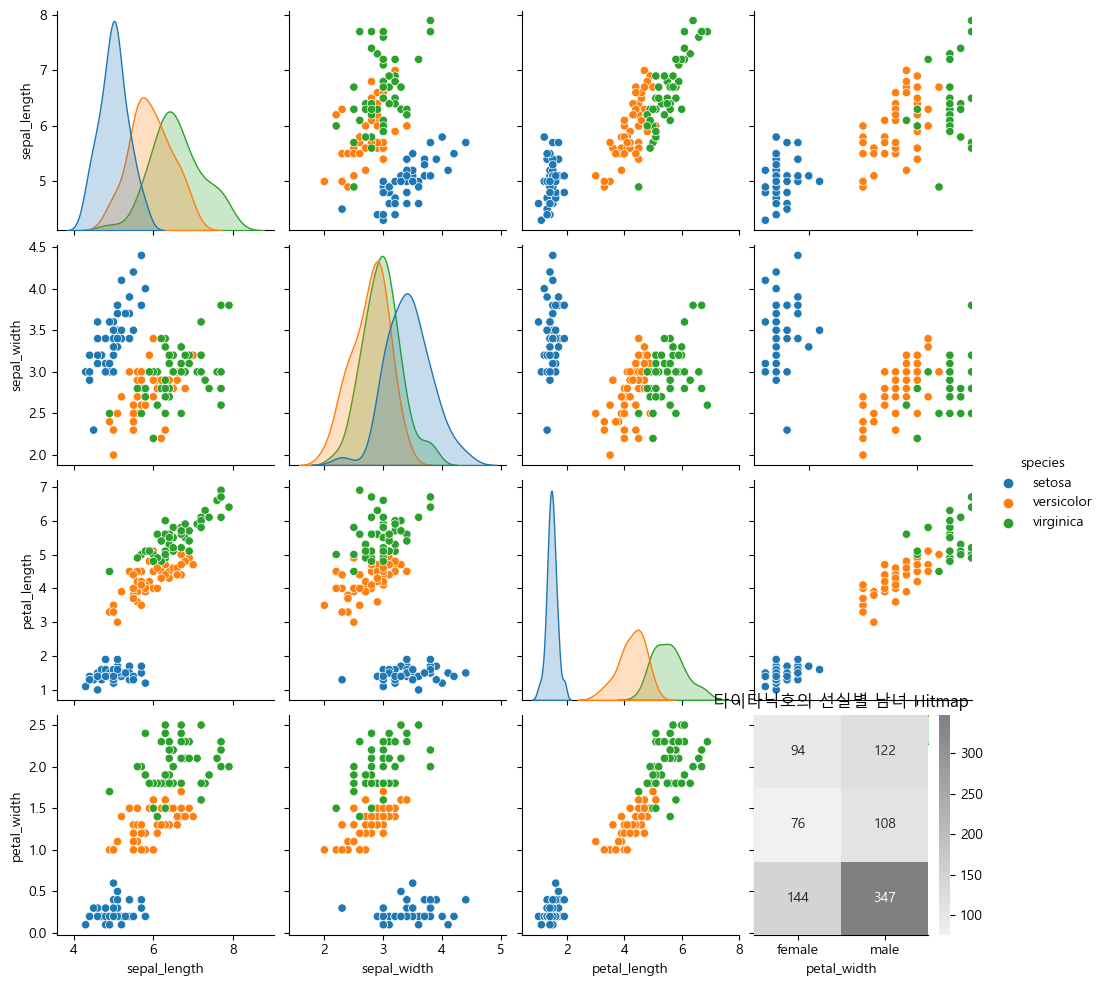

In [12]:
sns.heatmap(df, cmap=sns.light_palette('gray', as_cmap=True), annot=True, fmt='d')
plt.title('타이타닉호의 선실별 남녀 Hitmap')
plt.show()


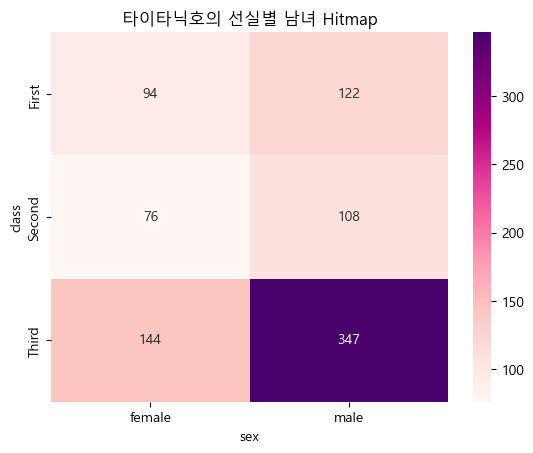

In [13]:
sns.heatmap(df, cmap='RdPu', annot=True, fmt='d') # annot:숫자 써줄건지 말건지, fmt:숫자 타입
# sns.heatmap(df, cmap='Yl0rBr', annot=True, fmt='d')
plt.title('타이타닉호의 선실별 남녀 Hitmap')
plt.show()

In [14]:
print(flights.shape)
flights.head()

(144, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


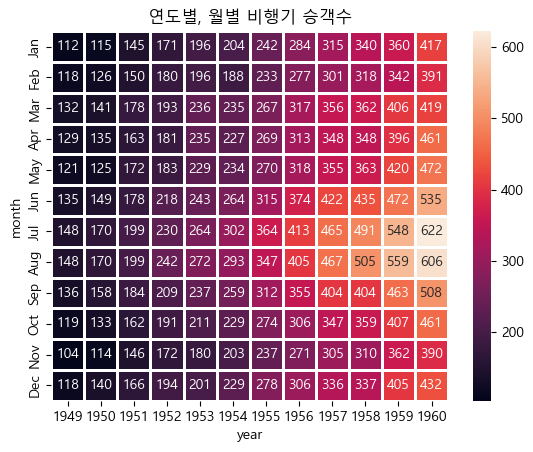

In [15]:
# flights.pivot_table('passengers', 'month', 'year')
passengers = flights.pivot(index='month', columns='year', values='passengers')
sns.heatmap(passengers, annot=True, fmt='d', lw=1)
plt.title('연도별, 월별 비행기 승객수')
plt.show()

- 다차원 복합 데이터

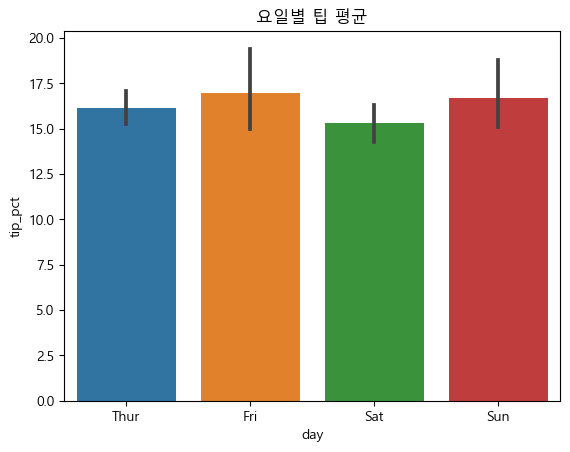

In [46]:
tips['tip_pct'] = (tips.tip / tips.total_bill * 100).round(2)
sns.barplot(x='day', y='tip_pct', data=tips)
plt.title('요일별 팁 평균')
plt.show()


In [17]:
print(mpg.shape)
mpg.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [18]:
mpg.name.str.split()

0      [chevrolet, chevelle, malibu]
1              [buick, skylark, 320]
2              [plymouth, satellite]
3                  [amc, rebel, sst]
4                     [ford, torino]
                   ...              
393              [ford, mustang, gl]
394                     [vw, pickup]
395                 [dodge, rampage]
396                   [ford, ranger]
397                    [chevy, s-10]
Name: name, Length: 398, dtype: object

In [19]:
mpg['manufacturer'] = mpg.name.apply(lambda x : x.split()[0])

In [20]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


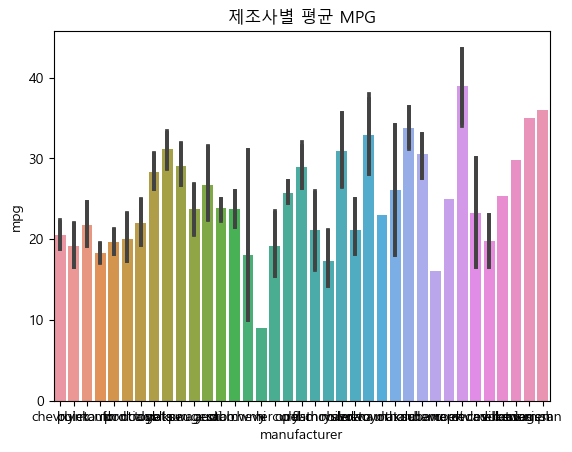

In [48]:
sns.barplot(x='manufacturer', y='mpg', data=mpg)
plt.title('제조사별 평균 MPG')
plt.show()

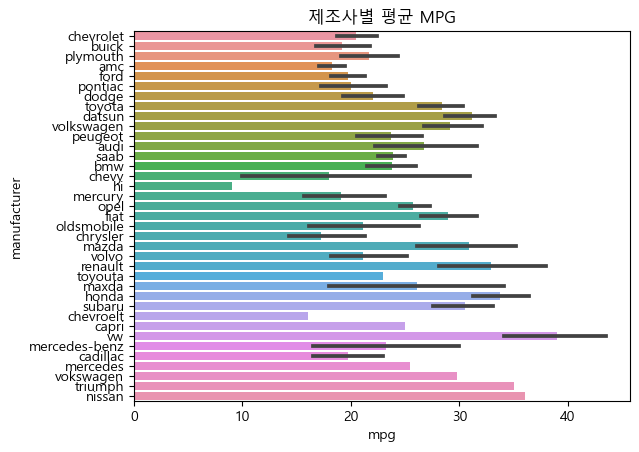

In [49]:
# x와 y를 바꿔주면 수평 막대그래프가 됨
sns.barplot(x='mpg', y='manufacturer', data=mpg)
plt.title('제조사별 평균 MPG')
plt.show()

- boxplot

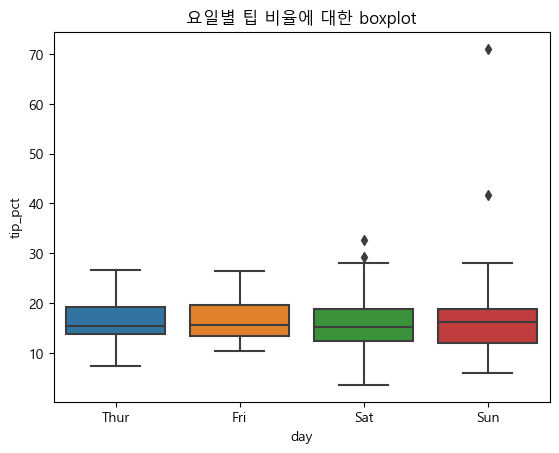

In [53]:
# 요일별 팁의 비율
sns.boxplot(x='day', y='tip_pct', data=tips)
plt.title('요일별 팁 비율에 대한 boxplot')
plt.show()

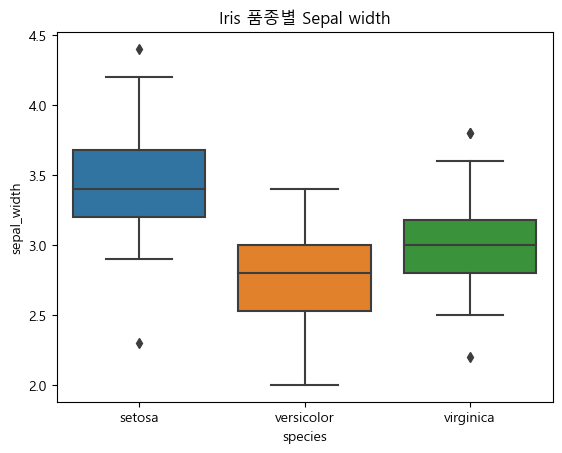

In [52]:
# iris
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.title('Iris 품종별 Sepal width')
plt.show()

In [25]:
# sns.boxplot(x=('sepal_width', 'sepal_length'), y='species', data=iris)
# plt.title('Iris 품종별 Sepal width');

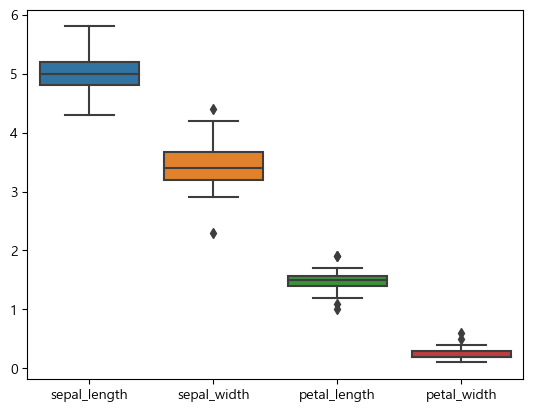

In [54]:
sns.boxplot(data=iris[iris.species == 'setosa'])
plt.show()

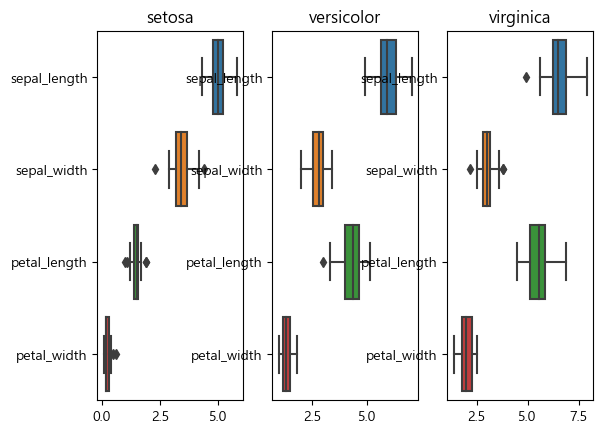

In [27]:
for i, species in enumerate(iris.species.unique()):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=iris[iris.species== species], orient='horizontal')
    plt.title(species)
plt.show()

- regplot

In [28]:
ans = sns.load_dataset('anscombe')
ans.head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58


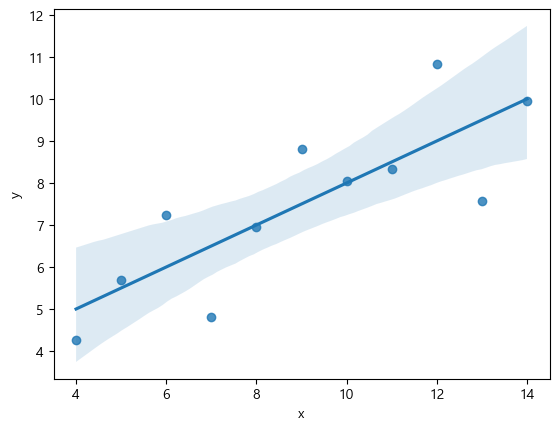

In [50]:
sns.regplot(x='x', y='y', data=ans[ans.dataset=='I'])
plt.show()

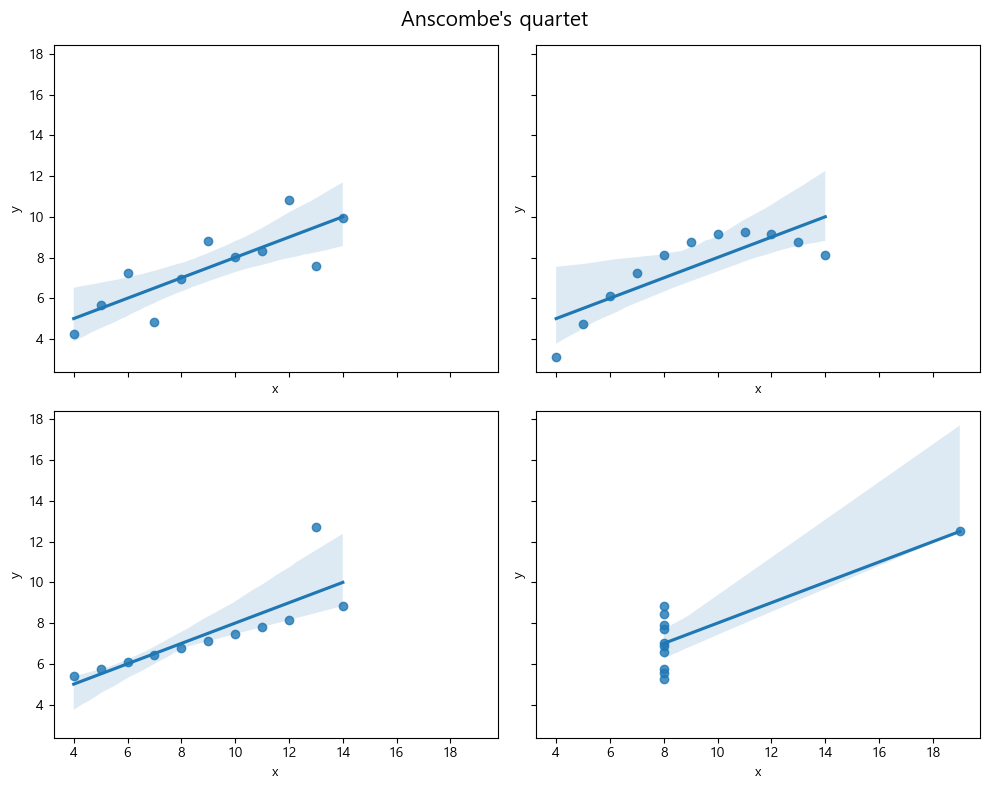

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
for i, roman in enumerate(ans.dataset.unique()):
    # row, col = i // 2, i % 2
    ax = axes[i // 2, i % 2]
    sns.regplot(x='x', y='y', data=ans[ans.dataset == roman], ax=ax)
fig.suptitle("Anscombe's quartet", fontsize=15)
plt.tight_layout()
plt.show()

- 연습문제

    - 1. titanic
        embark_town, sex 에 따른 생존율
        나이 => displot

In [31]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [33]:
titanic.drop(columns=['deck'], inplace=True)

In [34]:
titanic.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [35]:
titanic.embarked.fillna('S', inplace=True)
titanic.embark_town.fillna('Southampton', inplace=True)
titanic.age.fillna(round(titanic.age.median(), 1), inplace=True)

In [36]:
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [37]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [38]:
tp = titanic.pivot_table('survived', 'embark_town', 'sex') * 100
# tp = titanic.groupby(['embark_town', 'sex'])['survived'].agg(['mean'])
tp


sex,female,male
embark_town,,
Cherbourg,87.671233,30.526316
Queenstown,75.000000,7.317073
Southampton,69.268293,17.460317


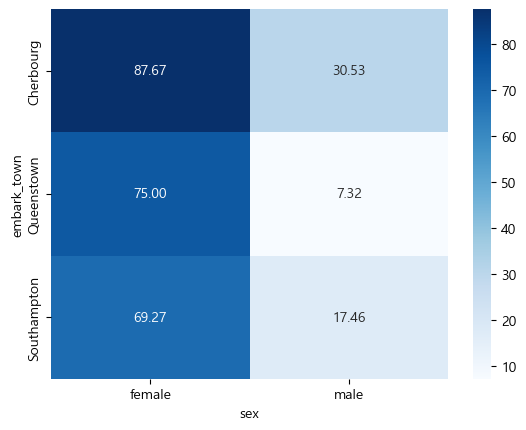

In [39]:
# annot 숫자 표시 여부, fmt : 숫자 표시 형식, d:정수, f:실수
sns.heatmap(tp, cmap='Blues', annot=True, fmt='.2f')
plt.show()

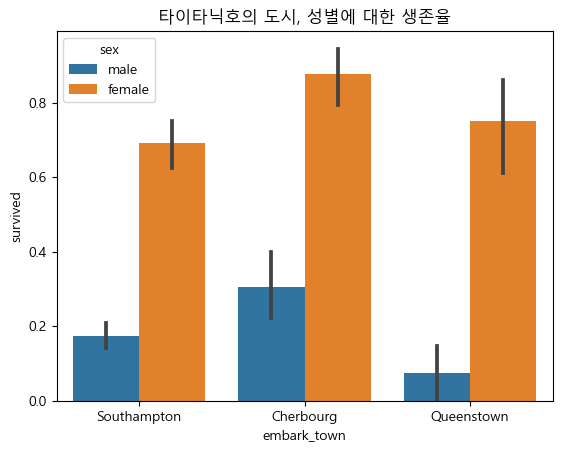

In [40]:
sns.barplot(x='embark_town', y='survived', hue='sex', data=titanic)
plt.title('타이타닉호의 도시, 성별에 대한 생존율')
plt.show()

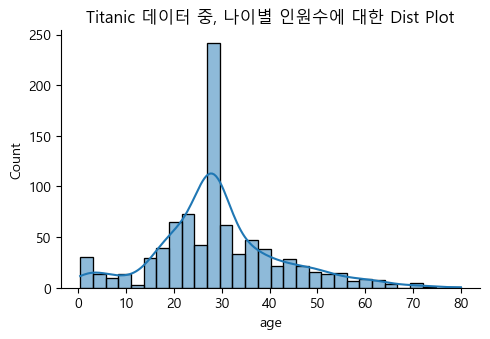

In [41]:
# 결측치를 채워서 나온 결과
fig = sns.displot(x='age', kde=True, data=titanic)
fig.fig.set_size_inches(5, 3)
plt.title('Titanic 데이터 중, 나이별 인원수에 대한 Dist Plot')
plt.show()

    - 2. CCTV
        자치구 법정순
        자치구 이름순
        CCTV 댓수

In [42]:
columns = '구분,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년'.split(',')
cctv = pd.read_csv('data/서울시 자치구 년도별 CCTV 설치 현황_221231기준.csv',  encoding='euc-kr', thousands=',')
cctv = cctv.iloc[:, 0:13]
cctv.columns = columns
cctv.drop(index=0, inplace=True)
cctv.구분 = cctv.구분.str.replace(' ', '')
cctv = cctv[['구분', '총계']]
cctv.columns = ['자치구', '총계']
# cctv.set_index('구분', inplace=True)
cctv.head()

,자치구,총계
1,종로구,1980
2,중구,2584
3,용산구,2847
4,성동구,4047
5,광진구,3480


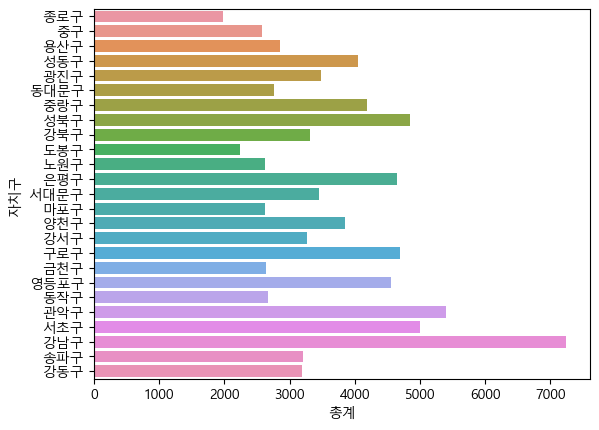

In [43]:
sns.barplot(x='총계', y='자치구', data=cctv)
plt.show()

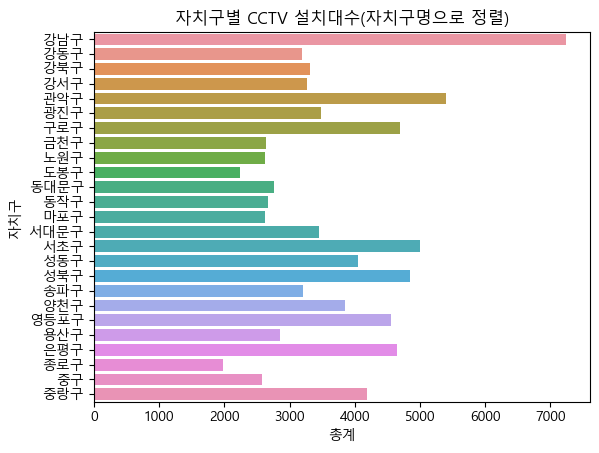

In [44]:
sns.barplot(x='총계', y=cctv.자치구.sort_values(), data=cctv)
plt.title('자치구별 CCTV 설치대수(자치구명으로 정렬)')
plt.show()

In [45]:
# cctv.sort_values(by='총계')
sns.barplot(x=cctv.sort_values(by='총계'), y='자치구', data=cctv)
plt.title('자치구별 CCTV 설치대수(자치구명으로 정렬)')
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().